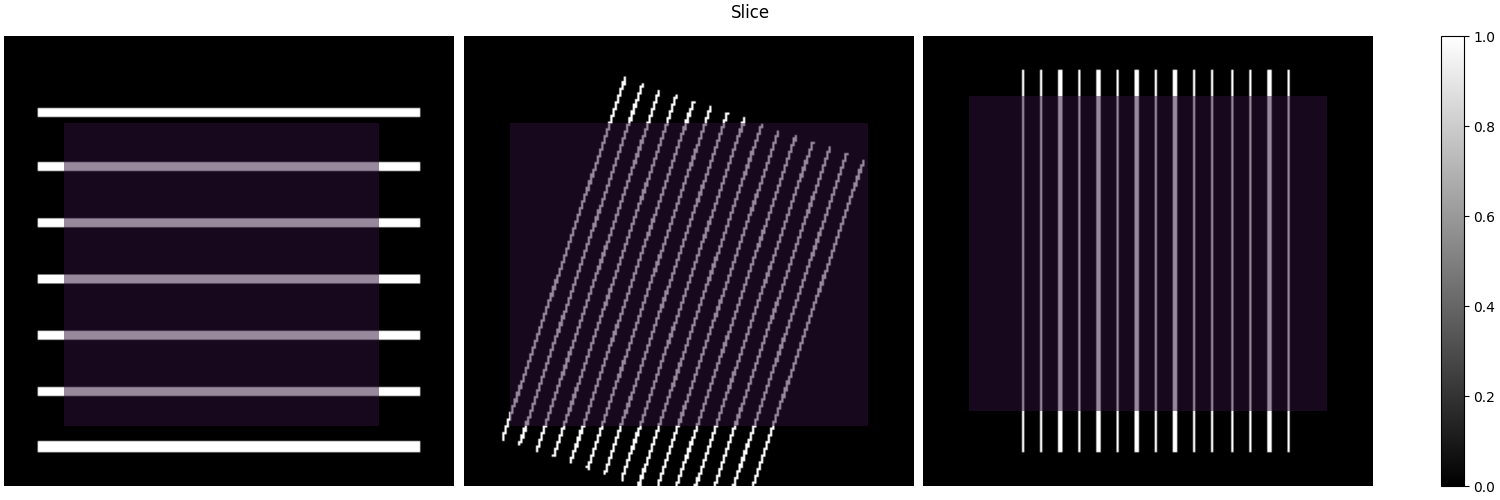

In [1]:
%matplotlib widget
from recotwix.prot_volumes import prot_volumes
from pytools import plot

file_protocol  = '/DATA2/rawdata/pyshim_data//soda_txt/soda_dump2.txt'
work_directory = '/DATA2/rawdata/pyshim_data/temp_nii/'

prot    = prot_volumes(file_protocol)
prot.get('adj')[0].to_filename(work_directory + 'adj.nii')

combined_slc = prot.get('slc').get_combined()
combined_adj = prot.get('adj').get_combined()

plot.plot3D_siemens(combined_slc.get_fdata(), combined_adj.get_fdata(), affine=combined_slc.affine, cmap='gray', overlay_cmap='turbo', clim=[0,1], title='Slice')

Software version: VD/VE (!?)

Scan  0


100%|██████████| 1.00G/1.00G [00:01<00:00, 711MB/s]


Extracting kspace...
kspace uncorrected shape: torch.Size([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 88, 1, 1, 108, 32, 108]), scantype: image
kspace corrected shape  : torch.Size([1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 88, 1, 1, 108, 32, 108]), scantype: image


k-space to image: 100%|██████████| 32/32 [00:00<00:00, 106.74it/s]


Calculating B0 map. ΔTE = 3080 μs
Masking brain...
[100%] BET: Performing 1000 of 1000 iterations.		
Unwrapping B0...


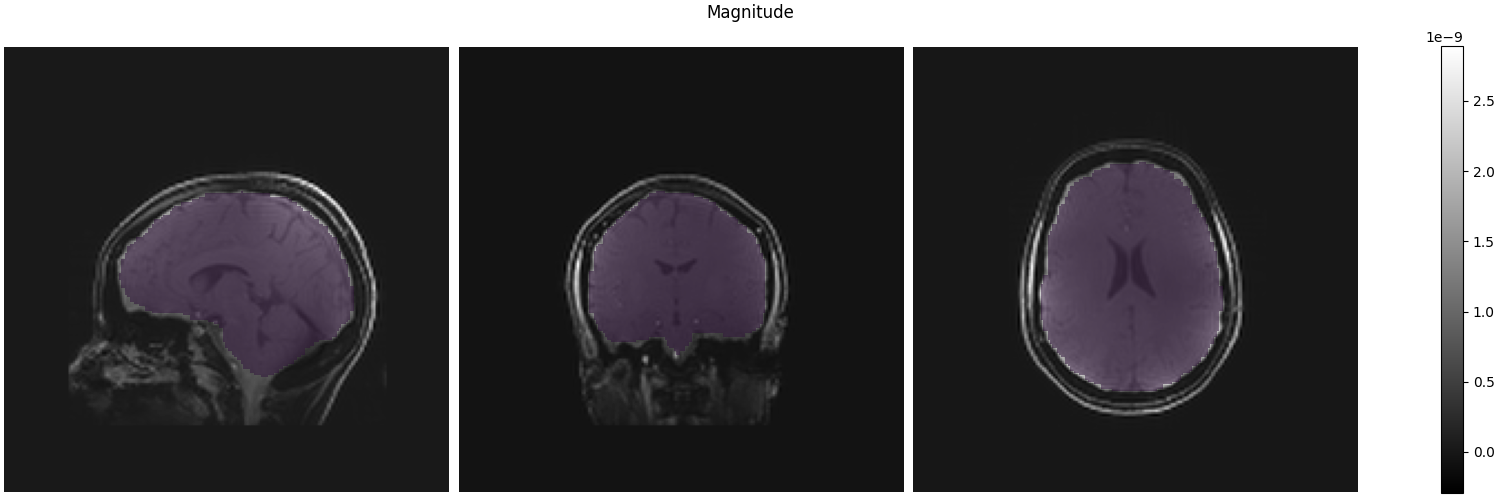

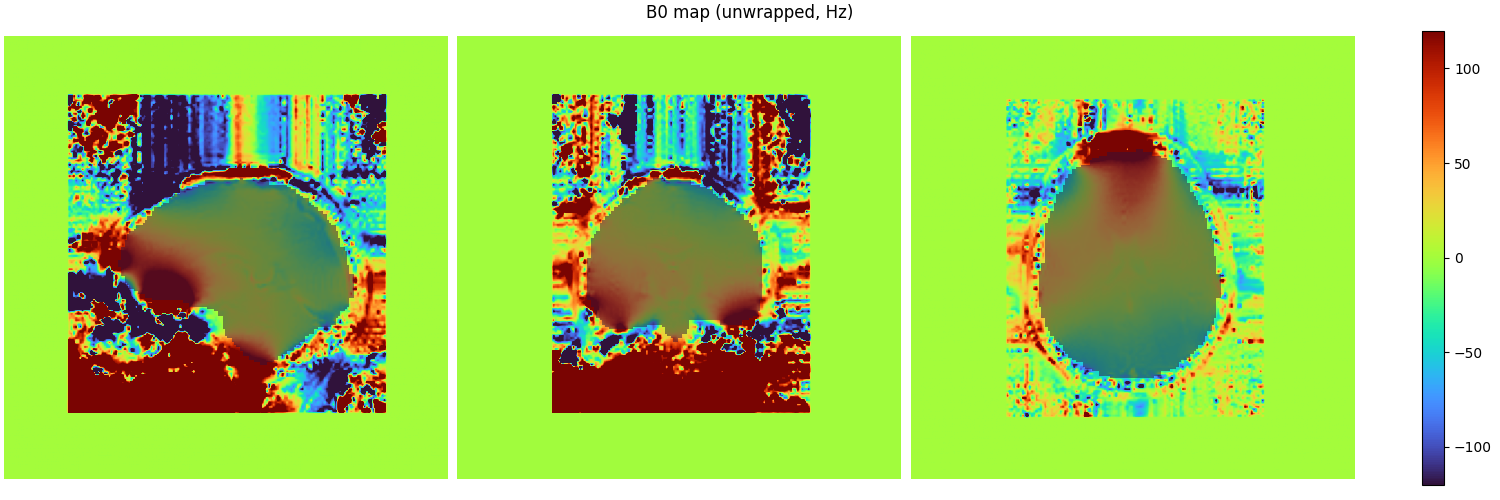

In [2]:
%matplotlib widget
from pytools import plot
from recotwix.sequences import recoB0
 
file_twix_B0   = '/DATA2/rawdata/pyshim_data/410.dat'
file_twix_B0   = '/DATA/aaghaeifar/rawdata/B0MapDataSet_7T/M700109/meas_MID00074_FID03504_aa_b0_Sag_WE_2_0mm.dat'
file_basismaps = '/DATA2/rawdata/pyshim_data/meas_MID00047_FID27956_aa_B0Mapping_2ndorder_IECO.nii'

b0_obj  = recoB0(file_twix_B0)

mag  = b0_obj.get_mag() ** 0.8
mask = b0_obj.mask_brain(mag, erode_size=3)

mag_nii  = b0_obj.make_nifti(mag)
mask_nii = b0_obj.make_nifti(mask)
b0_nii= b0_obj.make_nifti(b0_obj.get_b0hz())

b0_nii.to_filename(work_directory + 'b0.nii')
mask_nii.to_filename(work_directory + 'mask.nii')

plot.plot3D_siemens(mag_nii.get_fdata(), mask_nii.get_fdata(), mag_nii.affine, cmap='gray' ,title='Magnitude')
plot.plot3D_siemens(b0_nii.get_fdata(), mask_nii.get_fdata(), b0_nii.affine, clim=[-120, 120], cmap='turbo', title='B0 map (unwrapped, Hz)')

Software version: VD/VE (!?)

Scan  0


  0%|          | 0.00/513M [00:00<?, ?B/s]

100%|██████████| 513M/513M [00:01<00:00, 306MB/s]  


Extracting kspace...
kspace uncorrected shape: torch.Size([1, 1, 1, 1, 1, 1, 1, 34, 1, 1, 48, 1, 1, 64, 32, 48]), scantype: image
kspace corrected shape  : torch.Size([1, 1, 1, 1, 1, 1, 1, 34, 1, 1, 48, 1, 1, 64, 32, 64]), scantype: image
POCS reconstruction along dim = 15 started...


image to k-space: 100%|██████████| 32/32 [00:00<00:00, 235.67it/s]


kspace uncorrected shape: torch.Size([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 24, 1, 1, 24, 32, 64]), scantype: refscan
kspace corrected shape  : torch.Size([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 48, 1, 1, 64, 32, 64]), scantype: refscan
Computing coil sensitivity...
Calibration region 32x24x24
Done.
Combining coils... 


k-space to image: 100%|██████████| 32/32 [00:01<00:00, 21.49it/s]


GPU reconstruction
Size: 196608 Samples: 49151 Acc: 4.00
Inverse scaling of the data: 0.000001
l2 regularization: 0.000100
Regularization terms: 1, Supporting variables: 0
conjugate gradients
lsqr: add GPU wrapper
	 cg:  30
Total Time: 0.964192
GPU reconstruction
Size: 196608 Samples: 49151 Acc: 4.00
Inverse scaling of the data: 0.000001
l2 regularization: 0.000100
Regularization terms: 1, Supporting variables: 0
conjugate gradients
lsqr: add GPU wrapper
	 cg:  30
Total Time: 1.014050
GPU reconstruction
Size: 196608 Samples: 49151 Acc: 4.00
Inverse scaling of the data: 0.000001
l2 regularization: 0.000100
Regularization terms: 1, Supporting variables: 0
conjugate gradients
lsqr: add GPU wrapper
	 cg:  30
Total Time: 0.903983
GPU reconstruction
Size: 196608 Samples: 49151 Acc: 4.00
Inverse scaling of the data: 0.000001
l2 regularization: 0.000100
Regularization terms: 1, Supporting variables: 0
conjugate gradients
lsqr: add GPU wrapper
	 cg:  30
Total Time: 0.876051
GPU reconstruction
S

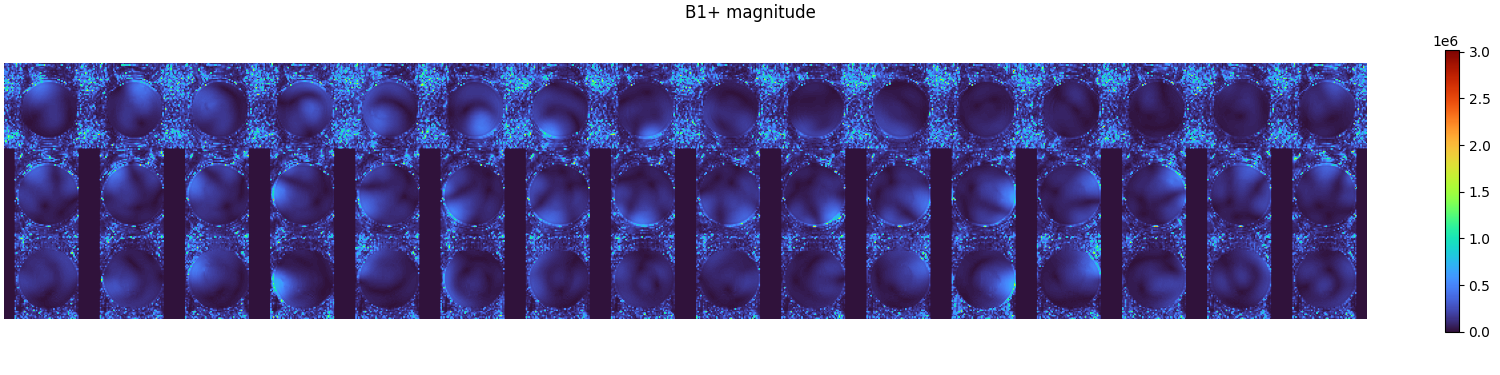

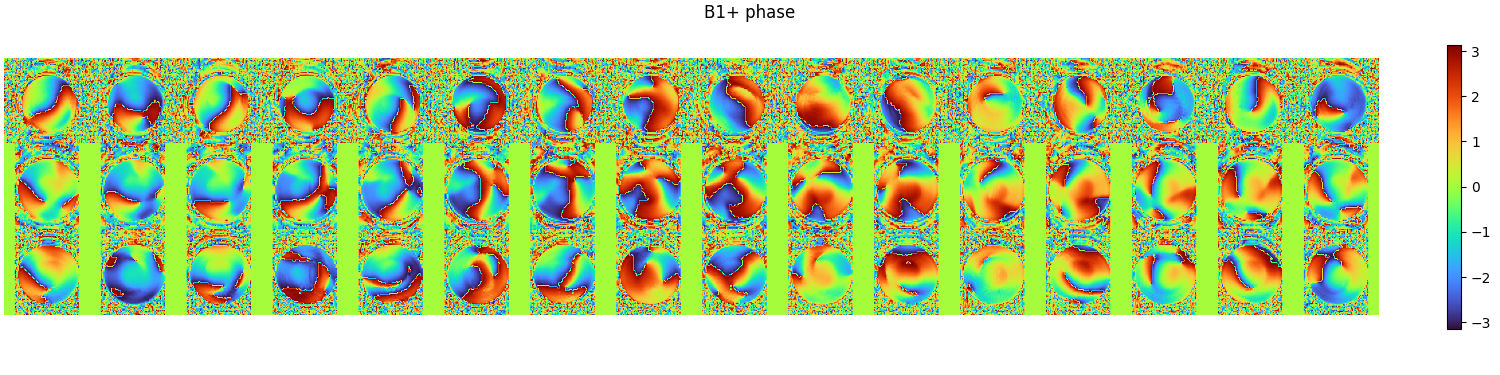

In [3]:
%matplotlib widget
from pytools import plot
from recotwix.sequences import recoB1TFLpTx

file_twix_B1   = '/DATA2/rawdata/twixtools_samples/meas_MID00866_FID61816_db_TFLb1_ICE_48Slc.dat'

b1_obj  = recoB1TFLpTx(file_twix_B1)
b1_nii      = b1_obj.make_nifti(b1_obj.img_b1)
b1_nii_mag  = b1_obj.make_nifti(b1_obj.img_b1.abs())
b1_nii_phs  = b1_obj.make_nifti(b1_obj.img_b1.angle())

b1_nii.to_filename(work_directory + 'b1.nii')
b1_nii_mag.to_filename(work_directory + 'b1_mag.nii')
b1_nii_phs.to_filename(work_directory + 'b1_phs.nii')

plot.plot4D_mosaic(b1_obj.reorder_dims(b1_obj.img_b1.abs()).detach().cpu().numpy(), title='B1+ magnitude')
plot.plot4D_mosaic(b1_obj.reorder_dims(b1_obj.img_b1.angle()).detach().cpu().numpy(), title='B1+ phase')


In [4]:
%matplotlib widget
import pyshim
import importlib

# b0_hz.orthoview()
# b0_hz.slicer()
work_directory = '/DATA2/rawdata/pyshim_data/temp_nii/'
filenames = [work_directory+'b1_mag.nii',
             work_directory+'b1_phs.nii',
             work_directory+'b0.nii', 
             work_directory+'mask.nii']

pyshim.set_work_directory(work_directory=work_directory)
std_affine, std_size = pyshim.create_standard_space(nifti_target=work_directory+'adj.nii')
filenames_r = pyshim.resample_to_standard_sapce(filenames, std_affine, std_size, work_directory)


Cleaning folder /DATA2/rawdata/pyshim_data/temp_nii


resampling to standard space: 100%|██████████| 4/4 [00:09<00:00,  2.47s/it]


In [5]:
import numpy as np
from pyshim import b1, opt_mls
importlib.reload(b1)

target_FA = 20
A = b1.create_system_matrix(filenames_r[0], filenames_r[1], filenames_r[2], filenames_r[3])
b = np.ones(A.shape[0]) * target_FA / 180 * np.pi
x, err = opt_mls(A, b)
print(x)

error 0.029/0.029:   0%|          | 0/50 [00:00<?, ?it/s]/DATA/aaghaeifar/Nextcloud/Python/pyshim/pyshim/shimming_base.py:109: RuntimeWarning: invalid value encountered in divide
  b  = target * b / np.abs(b) # = target * np.exp(1j*np.angle(b)) ;  update b with target magnitude and new phase
error 0.017/0.029: 100%|██████████| 50/50 [00:00<00:00, 57.71it/s]


[ 0.00010803-0.00124983j  0.00124611-0.00043556j  0.00117132-0.0011903j
  0.00102817+0.00031856j  0.00140204+0.00048408j  0.00044457+0.00075868j
  0.00036303+0.00120602j -0.00055255+0.00094349j -0.00044128+0.00149972j
 -0.00096545+0.00021043j -0.0013785 +0.00065373j -0.00107162-0.00077048j
 -0.00101052-0.00042827j -0.0003271 -0.00111956j -0.00056166-0.00098837j
  0.00032137-0.00091117j]
[0.029359881826254076, 0.019710555577891423, 0.01867127607184619, 0.01807671340887527, 0.017700061800227807, 0.017441664349458097, 0.017252933874140137, 0.01711133210736287, 0.01700228258114584, 0.016916400158352194, 0.016847442238590103, 0.016790885012251195, 0.016744605458709295, 0.016707381853467842, 0.016677009658877515, 0.016652027513494302, 0.016631466336744786, 0.01661440995447384, 0.016600158842754367, 0.01658823957547712, 0.016578277693841632, 0.016569910851966654, 0.016562858683979043, 0.01655685928965412, 0.016551803462108702, 0.016547559134021148, 0.01654398123139772, 0.01654094470913434, 0.

In [6]:
import numpy as np
x = np.random.rand(100,100) + 1j*np.random.rand(100,100)
print(x.shape)

# %timeit np.exp(1j*np.angle(x))
# %timeit x / np.abs(x)
# %timeit np.exp(1j*np.angle(x))
# %timeit x / np.abs(x)

a = np.exp(1j*np.angle(x))
b = x / np.abs(x)
print(np.array_equal(a,b))
print(a[(2,5,15,80), (20,15,35,18)])
print(b[(2,5,15,80), (20,15,35,18)])
print(np.max(np.abs(a-b)))
# import numpy as np

# x = np.array([[[1,2,3,4], [4,5,6,7], [8,9,10,11]], [[12,13,14,15], [16,17,18,19], [20,21,22,23]]])
# # x = np.array([[1, 2, 3], [4,5,6]])

# print(x.shape)
# print(x)

# print(x.flatten(order='C'))
# print(x.flatten(order='F'))

# xv, yv, zv = np.meshgrid(np.arange(2), np.arange(3), np.arange(4),indexing='ij')
# print(xv.flatten())
# print(yv.flatten())
# print(zv.flatten())

# xv, yv, zv = np.meshgrid(np.arange(2), np.arange(3), np.arange(4),indexing='xy')
# print(xv.flatten())
# print(yv.flatten())
# print(zv.flatten())

# for y in x:
#     print(y)

# print(np.array([[1,2,3,4]]).shape)

# x = np.array([1,2,0,4,0,2])
# print(np.nonzero(x)[0].size)
# print(x[np.nonzero(x)])
# print(x[x>0])

(100, 100)
False
[0.00772418+0.99997017j 0.99219149+0.12472384j 0.76523459+0.64375153j
 0.93912578+0.34357354j]
[0.00772418+0.99997017j 0.99219149+0.12472384j 0.76523459+0.64375153j
 0.93912578+0.34357354j]
3.663841114510704e-16
